In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Load dataset
data=('C:\\Users\\mamat\\Downloads\\room+occupancy+estimation\\Occupancy_Estimation.csv')
df = pd.read_csv(data, parse_dates=['Date'], dayfirst=True)

In [9]:
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018-01-11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018-01-11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018-01-11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018-01-11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [11]:
df.shape

(10129, 19)

In [15]:
#Data Preprocessing
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)
if 'Time' in df.columns:
    df.drop(columns=['Time'], inplace=True)


In [17]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [21]:
df.isna().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [23]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [25]:
 df.nunique()

S1_Temp                   24
S2_Temp                   69
S3_Temp                   29
S4_Temp                   27
S1_Light                  68
S2_Light                  82
S3_Light                 177
S4_Light                  75
S1_Sound                 231
S2_Sound                 185
S3_Sound                 258
S4_Sound                 106
S5_CO2                   186
S5_CO2_Slope            1579
S6_PIR                     2
S7_PIR                     2
Room_Occupancy_Count       4
dtype: int64

In [31]:
#Spliting Data
X = df.drop(columns=['Room_Occupancy_Count'])
y = df['Room_Occupancy_Count'] 


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

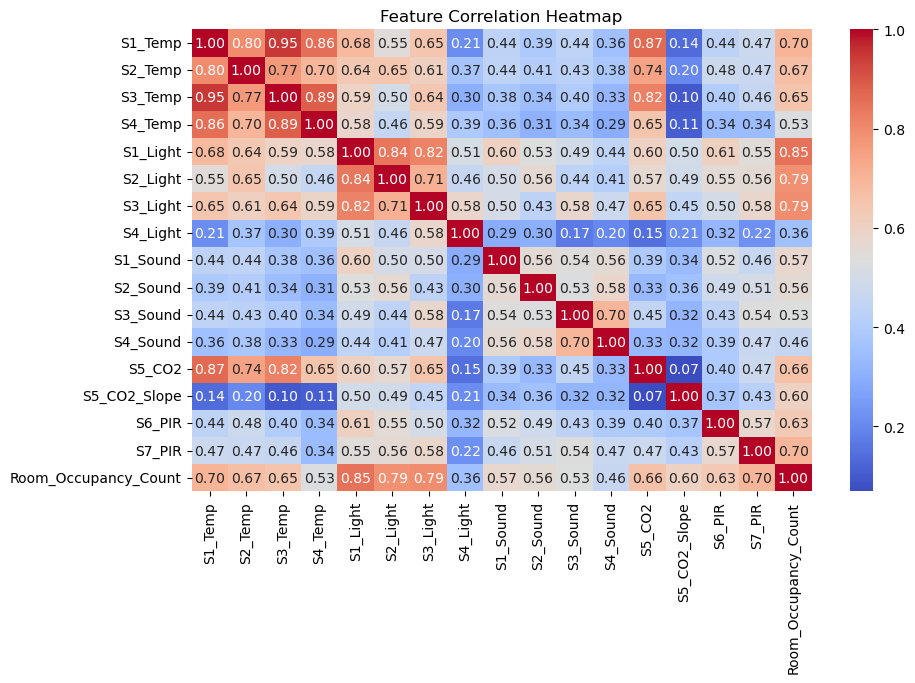

In [37]:
#plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [39]:

#Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

In [41]:
#Train the model,evaluate model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Cross-Validation Accuracy: 0.9941
Logistic Regression Test Accuracy: 0.9946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00        92
           2       0.95      0.99      0.97       149
           3       0.99      0.93      0.96       139

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026

--------------------------------------------------
Support Vector Machine Cross-Validation Accuracy: 0.9921
Support Vector Machine Test Accuracy: 0.9970
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00        92
           2       0.97      1.00      0.99       149
           3       0.99      0.97      0.98       139

    accuracy                           1.00 

In [45]:
#Checking Overfitting For random Forest
rf_model = models["Random Forest"]
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Training Accuracy: {train_accuracy}")
print(f"Random Forest Testing Accuracy: {test_accuracy}")
if train_accuracy - test_accuracy > 0.05:
    print("Warning: Possible Overfitting!")

Random Forest Training Accuracy: 0.9997531778353697
Random Forest Testing Accuracy: 0.9970384995064165


In [47]:
#Select 5 training and 5 testing Records for Prediction
train_sample = X_train[:5]
test_sample = X_test[:5]
original_train_labels = y_train.iloc[:5]
original_test_labels = y_test.iloc[:5]

In [49]:
predicted_train = rf_model.predict(train_sample)
predicted_test = rf_model.predict(test_sample)

In [51]:
#Display Results
print("Train Samples: Actual vs Predicted")
for i in range(5):
    print(f"Actual: {original_train_labels.iloc[i]}, Predicted: {predicted_train[i]}")

Train Samples: Actual vs Predicted
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


In [53]:
print("\nTest Samples: Actual vs Predicted")
for i in range(5):
    print(f"Actual: {original_test_labels.iloc[i]}, Predicted:{predicted_test[i]}")


Test Samples: Actual vs Predicted
Actual: 0, Predicted:0
Actual: 0, Predicted:0
Actual: 0, Predicted:0
Actual: 0, Predicted:0
Actual: 0, Predicted:0


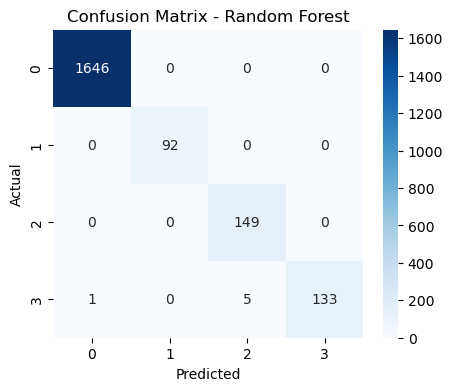

In [55]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

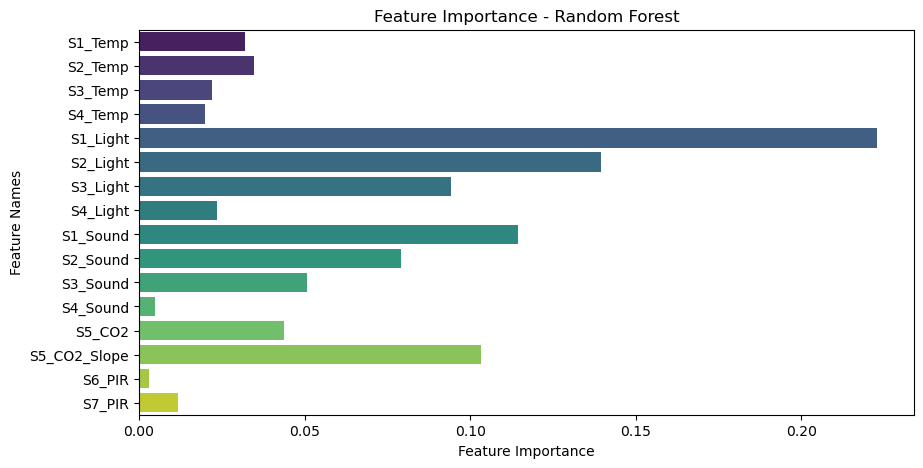

In [73]:
# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
##The Random Forest and Gradient Boosting models performed well, with high accuracy and relatively balanced precision and recall
##Logistic Regression and SVM had lower performance compared to tree-based models.
##DecisionTree showed signs of overfitting when the depth was too high
